In [151]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

citydata_df = pd.read_csv(city_data_to_load)
citydata_df.head()

ridedata_df = pd.read_csv(ride_data_to_load)
ridedata_df.head()

#Combine the data into a single dataset
merge_table = pd.merge(citydata_df, ridedata_df, on="city")


#Display the data table for preview
merge_table.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

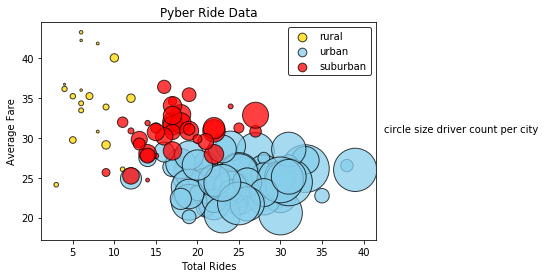

<Figure size 432x288 with 0 Axes>

In [195]:
city_data = merge_table.groupby("city")

# Average Fare ($) Per City
avg_fare_city = city_data  ["fare"].mean()

#Total Number of Rides Per City
Total_ride_city = city_data  ["ride_id"].count()

#Total Number of Drivers Per City
total_drivers_city = city_data  ["driver_count"].sum()

# City Type (Urban, Suburban, Rural)
city_data_type = citydata_df.set_index('city')['type']
city_data_type

# # Obtain the x and y coordinates for each of the three city types

city_table =  pd.DataFrame({"Average Fare": avg_fare_city ,
                                           "Total Rides": Total_ride_city,
                                           "Total Drivers" : total_drivers_city,
                                           "City Type" : city_data_type
                         })
city_table


# Build the scatter plots for each city types

rural =  city_table.loc[city_table["City Type"] == "Rural"]
urban =  city_table.loc[city_table["City Type"] == "Urban"]
suburban =  city_table.loc[city_table["City Type"] == "Suburban"]


plt.scatter(rural["Total Rides"] ,rural["Average Fare"] , marker="o", facecolors="Gold", edgecolors="Black", label= "rural",
             s=rural["Total Drivers"], alpha=0.75)
plt.scatter(urban["Total Rides"] ,urban["Average Fare"] , marker="o", facecolors="SkyBlue", edgecolors="Black", label= "urban",
             s=urban["Total Drivers"], alpha=0.75)
plt.scatter(suburban["Total Rides"] ,suburban["Average Fare"] , marker="o", facecolors="Red", edgecolors="Black", label= "suburban",
             s=suburban["Total Drivers"], alpha=0.75)


plt.title("Pyber Ride Data")
plt.xlabel("Total Rides")
plt.ylabel("Average Fare")

# Create a legend

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]


# Incorporate a text label regarding circle size
plt.figtext(0.92, .5, "circle size driver count per city", fontsize=10)

plt.show()
# Save Figure
plt.savefig("Pyber_bubble.png", bbox_inches = 'tight')

In [173]:
# Show plot
# plt.show()


## Total Fares by City Type

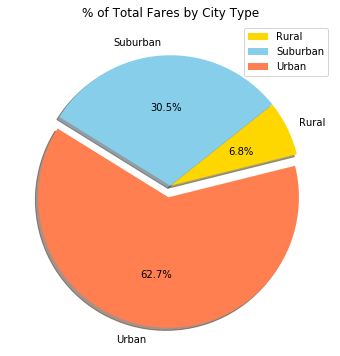

<Figure size 432x288 with 0 Axes>

In [188]:
Total_fares = merge_table["fare"].sum()
city_group = merge_table.groupby("type")

# Calculate Type Percents
Total_Fares_by_City = city_group["fare"].sum()
Total_Fares_by_City

# % of Total Fares by City Type
fares_percent = (Total_Fares_by_City/Total_fares) * 100 
fares_percent

# Build Pie Chart
colors = ["gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.09)
labels = fares_percent.index.tolist()
plt.figure(figsize=(8,6))
plt.pie(fares_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=14)
plt.title("% of Total Fares by City Type")

plt.legend(loc= "upper right").sizes = [75]
plt.show()
# Save Figure
plt.savefig("Total_Fares.png", bbox_inches = 'tight')


In [182]:
plt.show()

## Total Rides by City Type

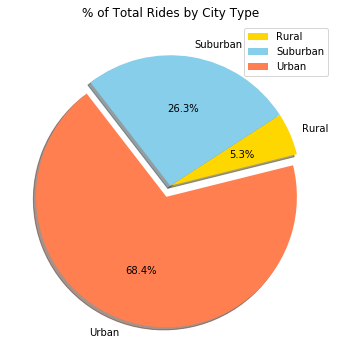

<Figure size 432x288 with 0 Axes>

In [194]:
Total_rides = merge_table["ride_id"].count()
city_group = merge_table.groupby("type")

Total_rides_by_City = city_group["ride_id"].count()

# Calculate Ride Percents
rides_percent = (Total_rides_by_City/Total_rides) * 100
rides_percent
# Build Pie Chart
colors = ["gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.09)
labels = rides_percent.index.tolist()
plt.figure(figsize=(8,6))
plt.pie(rides_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=14)
plt.title("% of Total Rides by City Type")
plt.legend(loc= "upper right")
plt.show()
# Save Figure
plt.savefig("Total_rides.png", bbox_inches = 'tight')


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

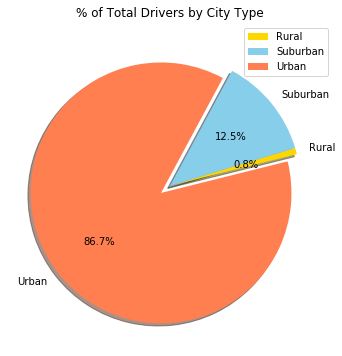

<Figure size 432x288 with 0 Axes>

In [193]:
Total_drivers = merge_table["driver_count"].sum()

city_group = merge_table.groupby("type")

Total_drivers_by_City = city_group["driver_count"].sum()

#Calculate Ride Percents
drivers_percent = (Total_drivers_by_City/Total_drivers) * 100
drivers_percent
# Build Pie Chart
colors = ["gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.09)
labels = drivers_percent.index.tolist()
plt.figure(figsize=(8,6))
plt.pie(drivers_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=14)
plt.title("% of Total Drivers by City Type")
plt.legend(loc= "upper right")
plt.show()

#Save Figure
plt.savefig("Total_drivers.png", bbox_inches = 'tight')

In [ ]:
# Show Figure
plt.show()